Clasificación del modelo SVM:
              precision    recall  f1-score   support

     Anómalo       1.00      0.08      0.14        93
      Normal       0.93      1.00      0.96      1080

    accuracy                           0.93      1173
   macro avg       0.96      0.54      0.55      1173
weighted avg       0.93      0.93      0.90      1173

Matriz de confusión:
[[   7   86]
 [   0 1080]]


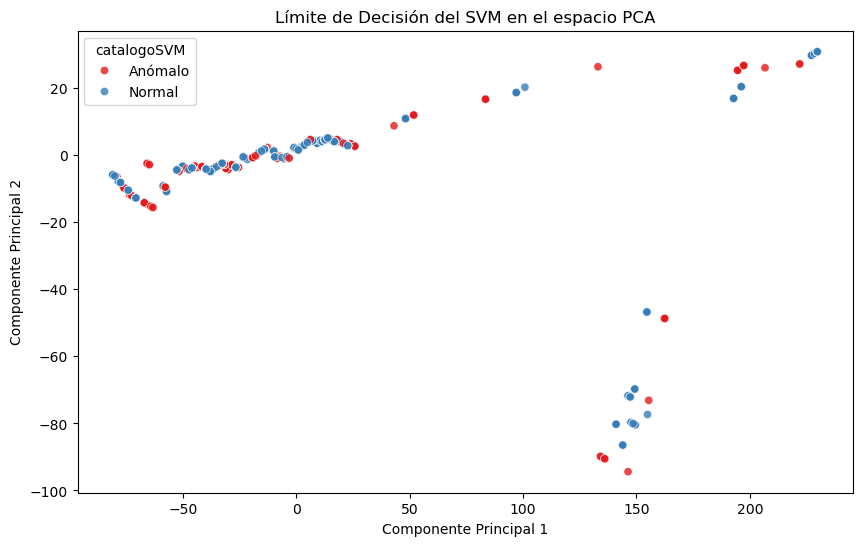

In [329]:
#svm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if  row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['catalogoSVM']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [330]:
#dataset luego de svm
data.tail(10)

,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,...,PC1,PC2,cluster,cluster_3,cluster_4,cluster_dbscan,target,Catalogo,Catalogo2,catalogoSVM
3898,6146,ROUTER CR2116-12G-4S 16 GB RAM,1,IVA 21,"16GB RAM, 13xGb Ethernet y 4xSFP+ Puertos",1,10422,MATERIALES COMUNICACIÓN,72,SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...,...,-3.245805,-0.838791,0,0,0,1,Anómalo,Anómalo,Anómalo,Anómalo
3899,6147,SOPORTE TRAPECIO 300MM DOBLE SUSPENSION PARA B...,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,75,OTROS CCESORIOS PARA CABLEADO,...,0.787638,1.583763,0,0,0,13,Normal,Normal,Normal,Normal
3900,6148,SELLOS PERSONALIZADOS,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal,Normal
3901,6149,IMPRESORA LASER B230V DNIA 34PPM LAN + WIFI,2,"IVA 10,5",NaN,1,10089,MAQUINAS Y EQUIPOS EMPRESA,93,IMPRESORAS,...,20.749926,3.570746,0,0,0,2,Anómalo,Anómalo,Anómalo,Anómalo
3902,6154,TABLET 10´ PROCESADOR QUAD CORE RAM 2GB 32G,2,"IVA 10,5",Tablet para Donacion TK 21216/2024,1,10073,EQUIPOS - Bienes de Cambio,236,CELULARES Y ACCESORIOS,...,154.591238,-46.763650,3,1,3,11,Normal,Normal,Normal,Normal
3903,6155,SMARTWATCH NM-PLUS BT,1,IVA 21,relojes digitales para Donacion TK 21216/2024,1,10073,EQUIPOS - Bienes de Cambio,236,CELULARES Y ACCESORIOS,...,154.591238,-46.763650,3,1,3,11,Normal,Normal,Normal,Normal
3904,6156,ETHERNET ADAPTADOR STARLINK,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,95,PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA,...,22.621832,2.866769,0,0,0,2,Normal,Normal,Normal,Normal
3905,6157,PIZARRA BLANCA MARCO ALUMINIO,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal,Normal
3906,6158,BORRADOR DE PIZARRA CON 3 MARCADORES,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,13.860961,5.146438,0,0,0,2,Normal,Normal,Normal,Normal
3907,6159,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,75,OTROS CCESORIOS PARA CABLEADO,...,0.787638,1.583763,0,0,0,13,Normal,Normal,Normal,Normal


Clasificación del modelo SVM:
              precision    recall  f1-score   support

     Anómalo       1.00      0.05      0.10        93
      Normal       0.92      1.00      0.96      1080

    accuracy                           0.92      1173
   macro avg       0.96      0.53      0.53      1173
weighted avg       0.93      0.92      0.89      1173

Matriz de confusión:
[[   5   88]
 [   0 1080]]


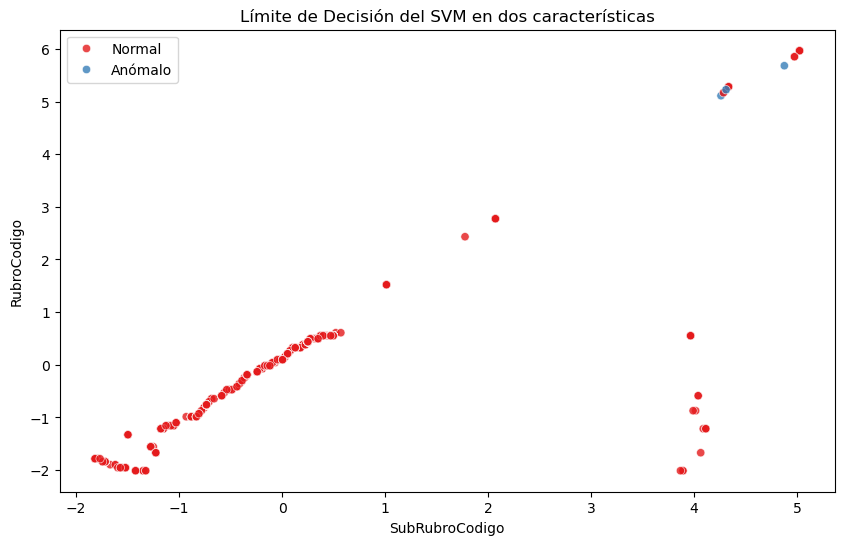

In [331]:
#svm basada en caracteristicas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM2 basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM2'] = data.apply(clasificar_producto, axis=1)

# Usar las columnas relevantes directamente como predictores
#columnas_relevantes = ['CuentaContableCodigo','ClasificacionCodigo', 'SubclasificacionCodigo', 'RubroCodigo','SubRubroCodigo' ]
columnas_relevantes = ['SubRubroCodigo', 'RubroCodigo', 'SubclasificacionCodigo', 'ClasificacionCodigo']
X = data[columnas_relevantes]
y = data['catalogoSVM2']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del resultado en dos dimensiones (solo aplicable si hay dos características dominantes)
# Usaremos solo las dos primeras columnas relevantes para simplificar la visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en dos características")
plt.xlabel(columnas_relevantes[0])
plt.ylabel(columnas_relevantes[1])
plt.show()


In [333]:
#dataset luego de SVM
data.tail(5)

,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,...,PC2,cluster,cluster_3,cluster_4,cluster_dbscan,target,Catalogo,Catalogo2,catalogoSVM,catalogoSVM2
3903,6155,SMARTWATCH NM-PLUS BT,1,IVA 21,relojes digitales para Donacion TK 21216/2024,1,10073,EQUIPOS - Bienes de Cambio,236,CELULARES Y ACCESORIOS,...,-46.763650,3,1,3,11,Normal,Normal,Normal,Normal,Normal
3904,6156,ETHERNET ADAPTADOR STARLINK,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,95,PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA,...,2.866769,0,0,0,2,Normal,Normal,Normal,Normal,Normal
3905,6157,PIZARRA BLANCA MARCO ALUMINIO,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,5.146438,0,0,0,2,Normal,Normal,Normal,Normal,Normal
3906,6158,BORRADOR DE PIZARRA CON 3 MARCADORES,1,IVA 21,NaN,1,10082,MUEBLES Y UTILES,86,ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS,...,5.146438,0,0,0,2,Normal,Normal,Normal,Normal,Normal
3907,6159,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,1,IVA 21,NaN,1,10422,MATERIALES COMUNICACIÓN,75,OTROS CCESORIOS PARA CABLEADO,...,1.583763,0,0,0,13,Normal,Normal,Normal,Normal,Normal


Clasificación del modelo SVM después de aplicar SMOTE:
              precision    recall  f1-score   support

     Anómalo       0.69      0.55      0.61      1082
      Normal       0.63      0.75      0.68      1086

    accuracy                           0.65      2168
   macro avg       0.66      0.65      0.65      2168
weighted avg       0.66      0.65      0.65      2168

Matriz de confusión:
[[597 485]
 [271 815]]


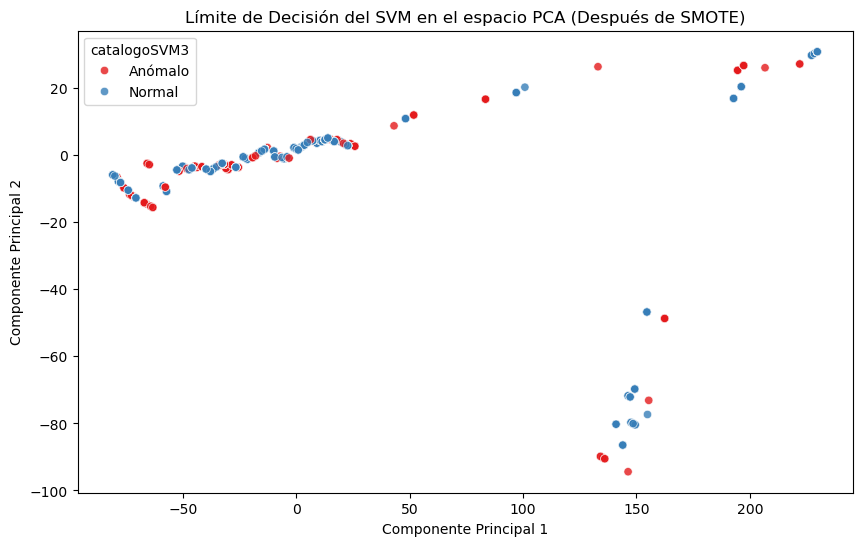

In [335]:
#SVM con PCA y smote
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM3 basada en reglas personalizadas

# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM3'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['catalogoSVM3']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM después de aplicar SMOTE:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM3', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA (Después de SMOTE)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Clasificación del modelo SVM después de ajustar hiperparámetros:
              precision    recall  f1-score   support

     Anómalo       0.69      0.55      0.61      1082
      Normal       0.63      0.76      0.69      1086

    accuracy                           0.65      2168
   macro avg       0.66      0.65      0.65      2168
weighted avg       0.66      0.65      0.65      2168

Matriz de confusión:
[[597 485]
 [263 823]]


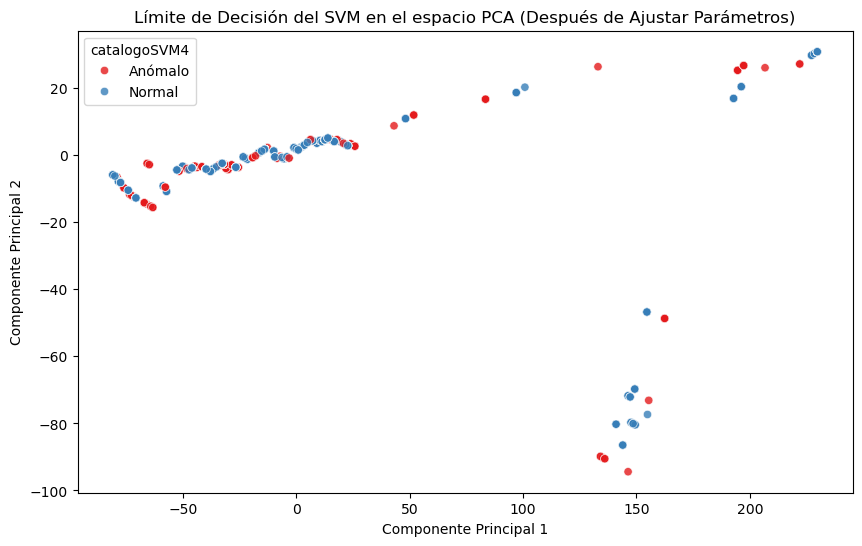

In [336]:
#SVM AJUSTANDO PARAMETROS
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM4 basada en reglas personalizadas

# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM4'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['catalogoSVM4']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Ajustar el modelo SVM con nuevos hiperparámetros
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM después de ajustar hiperparámetros:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM4', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA (Después de Ajustar Parámetros)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()
